# TRABALHO DE INTELIGÊNCIA ARTIFICIAL

## DEEP LEARNING

### Rock-Paper-Scissors Images DATASET (link abaixo)
https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors


#### GUILHERME ZAGO CANESIN
https://github.com/GuilhermeZCanesin/DeepLearning-2022.1.git

In [12]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from numba import cuda 
from keras.optimizers import Adam

### 2. DEFINIÇÃO DO MODELO PRÉ TREINADO
#### 4. TAMBÉM CONGELANDO PARTE DO MODELO PARA TREINO DA ÚLTIMA CAMADA

MODELO:
- INCEPTION V3

In [22]:
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(200, 300, 3))
for layer in base_model.layers:
    layer.trainable = False

### 10. DEFINIÇÃO DE VARIÁVEIS DE MODELO

In [16]:
batch_size = 32
# CLASSES (PEDRA - PAPEL - TESOURA)
num_classes = 3
dropout = 0.5
epochs = 500
lr = 0.001

### 5. ATRIBUINDO A FUNÇÃO DE ATIVAÇÃO DO MODELO
FUNÇÃO
- SOFTMAX

In [23]:
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(dropout)(x)
x = Dense(num_classes, activation='softmax')(x)

### CRIANDO O OBJETO DO MODELO

In [24]:
model = tf.keras.models.Model(base_model.input, x)
model.compile(Adam(learning_rate=lr),loss='categorical_crossentropy',metrics=['accuracy'])

### 9. CRIANDO OS CONJUNTOS DE TESTE E TREINO
#### 1. BAIXANDO O CONJUNTO DE DADOS

In [28]:
# INICIALIZANDO O OBJETO QUE RECUPERA AS AMOSTRAS DE TREINO COM A FUNÇÃO INCEPTIONV3
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2, preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

# DEFININDO O CAMINHO DAS IMAGENS (PASTA INPUT), OS NOMES DAS PASTAS DEVEM TER OS MESMOS NOMES APRESENTADOS EM "classes" ABAIXO
train_generator = train_data_gen.flow_from_directory('input/',
                                                 target_size=(200, 300),
                                                 batch_size=batch_size,
                                                 class_mode="categorical",
                                                 shuffle=False,
                                                 classes=['paper', 'rock', 'scissors'],
                                                 subset='training')

# DEFININDO O CAMINHO DAS IMAGENS (PASTA INPUT), OS NOMES DAS PASTAS DEVEM TER OS MESMOS NOMES APRESENTADOS EM "classes" ABAIXO
test_generator = train_data_gen.flow_from_directory('input/',
                                                 target_size=(200, 300),
                                                 batch_size=16,
                                                 class_mode="categorical",
                                                 shuffle=False,
                                                 classes=['paper', 'rock', 'scissors'],
                                                 subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


### EXECUTANDO O TREINO DO MODELO

#### 6. OTIMIZADOR: ADAM
#### 7. MÉTRICA DE AVALIAÇÃO: ACURÁCIA
#### 8. MÉTRICA DE ERRO: CATEGORICAL CROSS ENTROPY

In [29]:
# DEFININDO OTIMIZADOR, FUNÇÃO DE CUSTO E MÉTRICA
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])


step_size_train = train_generator.n//train_generator.batch_size
step_size_test = test_generator.n//test_generator.batch_size


history = model.fit(
        train_generator,
        steps_per_epoch=step_size_train,
        epochs=epochs,
        shuffle=True,
        validation_data=test_generator,
        validation_steps=step_size_test)

Epoch 1/500
54/54 [==============================] - 285s 5s/step - loss: 50.9279 - accuracy: 0.6521 - val_loss: 0.9280 - val_accuracy: 0.9421
Epoch 2/500
54/54 [==============================] - 274s 5s/step - loss: 0.5931 - accuracy: 0.9500 - val_loss: 0.1617 - val_accuracy: 0.9722
Epoch 3/500
54/54 [==============================] - 264s 5s/step - loss: 0.1452 - accuracy: 0.9738 - val_loss: 0.0606 - val_accuracy: 0.9792
Epoch 4/500
54/54 [==============================] - 267s 5s/step - loss: 0.0778 - accuracy: 0.9808 - val_loss: 0.0526 - val_accuracy: 0.9815
Epoch 5/500
54/54 [==============================] - 287s 5s/step - loss: 0.0349 - accuracy: 0.9889 - val_loss: 0.0355 - val_accuracy: 0.9884
Epoch 6/500
54/54 [==============================] - 249s 5s/step - loss: 0.0270 - accuracy: 0.9913 - val_loss: 0.0450 - val_accuracy: 0.9884
Epoch 7/500
54/54 [==============================] - 261s 5s/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.0364 - val_accuracy: 0.9861
Epoch

54/54 [==============================] - 219s 4s/step - loss: 0.0159 - accuracy: 0.9953 - val_loss: 2.5907e-04 - val_accuracy: 1.0000
Epoch 59/500
54/54 [==============================] - 220s 4s/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0081 - val_accuracy: 0.9977
Epoch 60/500
54/54 [==============================] - 222s 4s/step - loss: 0.0242 - accuracy: 0.9930 - val_loss: 0.0090 - val_accuracy: 0.9931
Epoch 61/500
54/54 [==============================] - 219s 4s/step - loss: 0.0318 - accuracy: 0.9907 - val_loss: 0.0248 - val_accuracy: 0.9977
Epoch 62/500
54/54 [==============================] - 218s 4s/step - loss: 0.0526 - accuracy: 0.9860 - val_loss: 6.0541e-04 - val_accuracy: 1.0000
Epoch 63/500
54/54 [==============================] - 220s 4s/step - loss: 0.0295 - accuracy: 0.9919 - val_loss: 0.0078 - val_accuracy: 0.9977
Epoch 64/500
54/54 [==============================] - 221s 4s/step - loss: 0.0237 - accuracy: 0.9930 - val_loss: 0.0233 - val_accuracy: 0.9977
Epoc

54/54 [==============================] - 219s 4s/step - loss: 0.0357 - accuracy: 0.9831 - val_loss: 0.0069 - val_accuracy: 0.9977
Epoch 116/500
54/54 [==============================] - 221s 4s/step - loss: 0.0634 - accuracy: 0.9808 - val_loss: 0.0320 - val_accuracy: 0.9931
Epoch 117/500
54/54 [==============================] - 221s 4s/step - loss: 0.0343 - accuracy: 0.9866 - val_loss: 0.0166 - val_accuracy: 0.9977
Epoch 118/500
54/54 [==============================] - 219s 4s/step - loss: 0.0391 - accuracy: 0.9860 - val_loss: 0.0129 - val_accuracy: 0.9977
Epoch 119/500
54/54 [==============================] - 219s 4s/step - loss: 0.0190 - accuracy: 0.9907 - val_loss: 0.0064 - val_accuracy: 0.9977
Epoch 120/500
54/54 [==============================] - 222s 4s/step - loss: 0.0263 - accuracy: 0.9889 - val_loss: 0.0088 - val_accuracy: 0.9977
Epoch 121/500
54/54 [==============================] - 222s 4s/step - loss: 0.0244 - accuracy: 0.9901 - val_loss: 0.0134 - val_accuracy: 0.9977
Epoch 

Epoch 172/500
54/54 [==============================] - 226s 4s/step - loss: 0.0298 - accuracy: 0.9889 - val_loss: 0.0151 - val_accuracy: 0.9954
Epoch 173/500
54/54 [==============================] - 228s 4s/step - loss: 0.0119 - accuracy: 0.9971 - val_loss: 0.0076 - val_accuracy: 0.9954
Epoch 174/500
54/54 [==============================] - 223s 4s/step - loss: 0.0315 - accuracy: 0.9895 - val_loss: 0.0109 - val_accuracy: 0.9954
Epoch 175/500
54/54 [==============================] - 219s 4s/step - loss: 0.0218 - accuracy: 0.9901 - val_loss: 0.0300 - val_accuracy: 0.9954
Epoch 176/500
54/54 [==============================] - 219s 4s/step - loss: 0.0140 - accuracy: 0.9936 - val_loss: 0.0111 - val_accuracy: 0.9977
Epoch 177/500
54/54 [==============================] - 218s 4s/step - loss: 0.0226 - accuracy: 0.9901 - val_loss: 0.0124 - val_accuracy: 0.9977
Epoch 178/500
54/54 [==============================] - 222s 4s/step - loss: 0.0142 - accuracy: 0.9948 - val_loss: 0.0262 - val_accuracy:

Epoch 229/500
54/54 [==============================] - 221s 4s/step - loss: 0.0357 - accuracy: 0.9924 - val_loss: 0.0041 - val_accuracy: 0.9977
Epoch 230/500
54/54 [==============================] - 224s 4s/step - loss: 0.0234 - accuracy: 0.9907 - val_loss: 0.0041 - val_accuracy: 0.9977
Epoch 231/500
54/54 [==============================] - 231s 4s/step - loss: 0.0386 - accuracy: 0.9901 - val_loss: 0.0042 - val_accuracy: 0.9977
Epoch 232/500
54/54 [==============================] - 223s 4s/step - loss: 0.0659 - accuracy: 0.9884 - val_loss: 0.0042 - val_accuracy: 0.9977
Epoch 233/500
54/54 [==============================] - 219s 4s/step - loss: 0.0319 - accuracy: 0.9884 - val_loss: 0.0085 - val_accuracy: 0.9954
Epoch 234/500
54/54 [==============================] - 219s 4s/step - loss: 0.0329 - accuracy: 0.9936 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 235/500
54/54 [==============================] - 222s 4s/step - loss: 0.0271 - accuracy: 0.9889 - val_loss: 0.0045 - val_accuracy:

54/54 [==============================] - 221s 4s/step - loss: 0.0167 - accuracy: 0.9959 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 286/500
54/54 [==============================] - 221s 4s/step - loss: 0.0248 - accuracy: 0.9971 - val_loss: 0.0044 - val_accuracy: 0.9977
Epoch 287/500
54/54 [==============================] - 221s 4s/step - loss: 0.0402 - accuracy: 0.9872 - val_loss: 0.0130 - val_accuracy: 0.9954
Epoch 288/500
54/54 [==============================] - 220s 4s/step - loss: 0.0173 - accuracy: 0.9924 - val_loss: 0.0093 - val_accuracy: 0.9931
Epoch 289/500
54/54 [==============================] - 220s 4s/step - loss: 0.0150 - accuracy: 0.9930 - val_loss: 0.0432 - val_accuracy: 0.9977
Epoch 290/500
54/54 [==============================] - 219s 4s/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.0169 - val_accuracy: 0.9954
Epoch 291/500
54/54 [==============================] - 219s 4s/step - loss: 0.0128 - accuracy: 0.9965 - val_loss: 0.0274 - val_accuracy: 0.9954
Ep

Epoch 342/500
54/54 [==============================] - 250s 5s/step - loss: 0.0093 - accuracy: 0.9977 - val_loss: 0.0023 - val_accuracy: 0.9977
Epoch 343/500
54/54 [==============================] - 261s 5s/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.0023 - val_accuracy: 0.9977
Epoch 344/500
54/54 [==============================] - 279s 5s/step - loss: 0.0101 - accuracy: 0.9959 - val_loss: 0.0023 - val_accuracy: 0.9977
Epoch 345/500
54/54 [==============================] - 244s 5s/step - loss: 0.0073 - accuracy: 0.9971 - val_loss: 0.0022 - val_accuracy: 0.9977
Epoch 346/500
54/54 [==============================] - 249s 5s/step - loss: 0.0047 - accuracy: 0.9983 - val_loss: 0.0022 - val_accuracy: 0.9977
Epoch 347/500
54/54 [==============================] - 250s 5s/step - loss: 0.0096 - accuracy: 0.9959 - val_loss: 5.3305e-04 - val_accuracy: 1.0000
Epoch 348/500
54/54 [==============================] - 231s 4s/step - loss: 0.0103 - accuracy: 0.9965 - val_loss: 3.9813e-04 - val_a

54/54 [==============================] - 246s 5s/step - loss: 0.0674 - accuracy: 0.9953 - val_loss: 0.2197 - val_accuracy: 0.9861
Epoch 399/500
54/54 [==============================] - 229s 4s/step - loss: 0.1153 - accuracy: 0.9930 - val_loss: 0.0044 - val_accuracy: 0.9977
Epoch 400/500
54/54 [==============================] - 227s 4s/step - loss: 0.0188 - accuracy: 0.9977 - val_loss: 6.2322e-04 - val_accuracy: 1.0000
Epoch 401/500
54/54 [==============================] - 226s 4s/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 6.5578e-04 - val_accuracy: 1.0000
Epoch 402/500
54/54 [==============================] - 226s 4s/step - loss: 0.0202 - accuracy: 0.9948 - val_loss: 6.0524e-04 - val_accuracy: 1.0000
Epoch 403/500
54/54 [==============================] - 228s 4s/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 3.8210e-05 - val_accuracy: 1.0000
Epoch 404/500
54/54 [==============================] - 227s 4s/step - loss: 0.0160 - accuracy: 0.9959 - val_loss: 4.8841e-04 - val_acc

54/54 [==============================] - 337s 6s/step - loss: 0.0077 - accuracy: 0.9965 - val_loss: 1.0802e-05 - val_accuracy: 1.0000
Epoch 455/500
54/54 [==============================] - 287s 5s/step - loss: 0.0080 - accuracy: 0.9965 - val_loss: 2.8418e-06 - val_accuracy: 1.0000
Epoch 456/500
54/54 [==============================] - 261s 5s/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 2.5632e-06 - val_accuracy: 1.0000
Epoch 457/500
54/54 [==============================] - 236s 4s/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 1.9720e-06 - val_accuracy: 1.0000
Epoch 458/500
54/54 [==============================] - 236s 4s/step - loss: 0.0094 - accuracy: 0.9959 - val_loss: 1.8507e-06 - val_accuracy: 1.0000
Epoch 459/500
54/54 [==============================] - 236s 4s/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 1.8305e-06 - val_accuracy: 1.0000
Epoch 460/500
54/54 [==============================] - 235s 4s/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.0606 - val

#### APRESENTANDO OS RESULTADOS

In [42]:
results = model.evaluate_generator(test_generator, 500)
print('Acc: %.3f, Loss: %.3f' % (results[1], results[0]))

C:\Users\gui_r\AppData\Local\Temp\ipykernel_16068\2822761959.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  results = model.evaluate_generator(test_generator, 500)


Acc: 0.998, Loss: 0.029


### 11. APRESENTANDO OS GRÁFICOS DE LINHA
- ERRO DO TESTE E TREINO

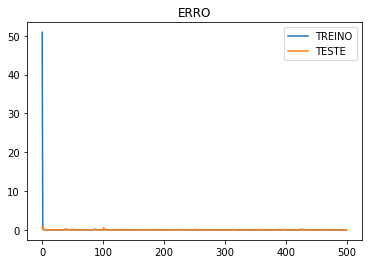

In [36]:
plt.title('ERRO')
plt.plot(history.history['loss'], label='TREINO')
plt.plot(history.history['val_loss'], label='TESTE')
plt.legend()
plt.show()

- ACURÁCIA DO TESTE E TREINO

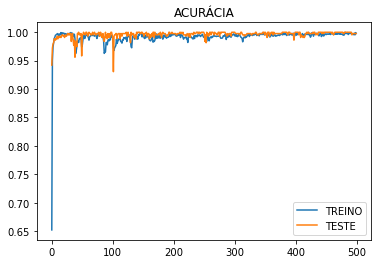

In [37]:
plt.title('ACURÁCIA')
plt.plot(history.history['accuracy'], label='TREINO')
plt.plot(history.history['val_accuracy'], label='TESTE')
plt.legend()
plt.show()

### 12. APRESENTANDO A MATRIZ DE CONFUSÃO

28/28 [==============================] - 42s 1s/step


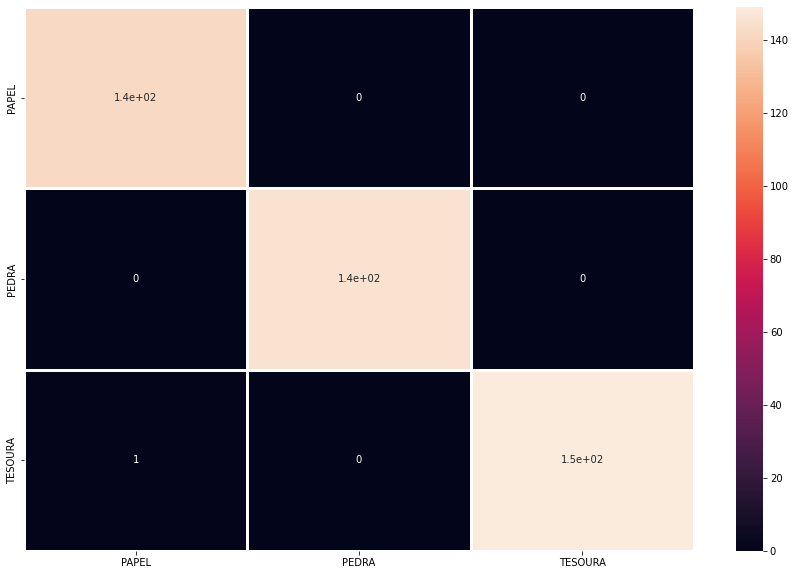

In [41]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
matrix = confusion_matrix(test_generator.classes, y_pred)
df_cm = pd.DataFrame(matrix, index = ['PAPEL', 'PEDRA', 'TESOURA'],
                  columns = ['PAPEL', 'PEDRA', 'TESOURA'])
plt.figure(figsize = (15,10))
sn.heatmap(df_cm, annot=True, linewidths=2.5)
plt.show()

### 13. APRESENTANDO OS DADOS DO CONJUNTO DE TESTES
#### ACURÁCIA, PRECISÃO, REVOCAÇÃO E F1-SCORE

In [39]:
print(classification_report(test_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       142
           1       1.00      1.00      1.00       145
           2       1.00      0.99      1.00       150

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437

